**Part1 Preprocessing**

(768, 9)
(768, 8)
['Outcome_onehot__x0_0', 'Outcome_onehot__x0_1', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


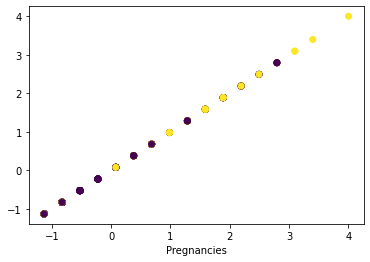

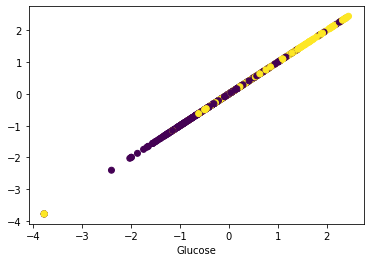

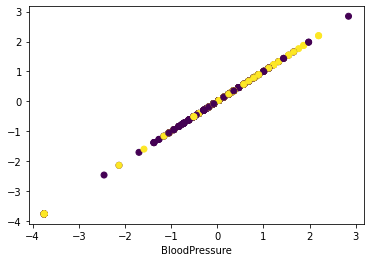

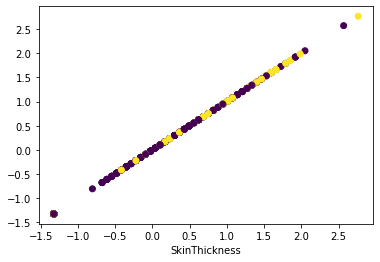

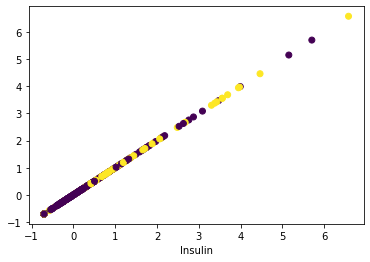

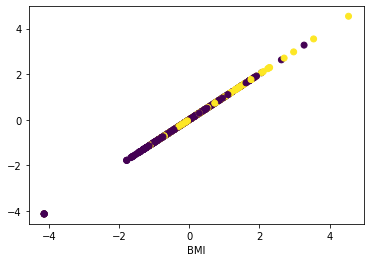

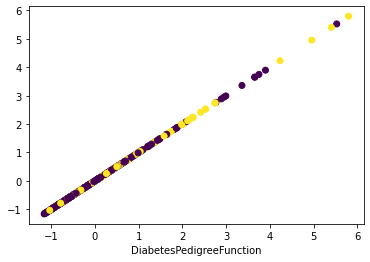

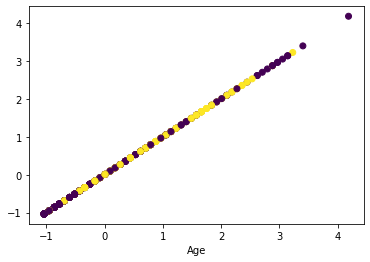

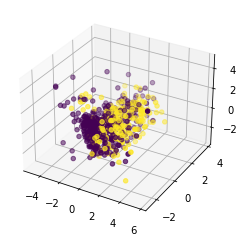

(614, 2)


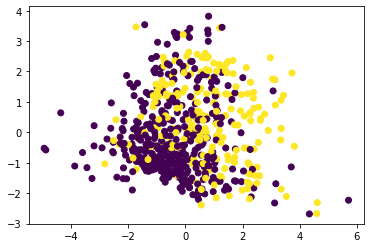

In [45]:
### Import modules
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### load data and transform to array
### dataset used in this project is downloaded here: https://www.kaggle.com/datasets/kandij/diabetes-dataset/versions/1?resource=download
data = pd.read_csv("./diabetes2.csv")
print(data.shape)

ct = ColumnTransformer(
    [('Outcome_onehot', OneHotEncoder(dtype='int'), ['Outcome'])],
    remainder='passthrough')
data_trans = ct.fit_transform(data)
X = data_trans[:,2:]      ###X features: factors that might determine diabetes.
y = data_trans[:,1]       ###y label: 1 means diabetes positive, 0 negative.
### or directly use to_numpy() function define the label: y1 = data["Outcome"].to_numpy()
print(X.shape)
data.isna()
### Checking the integrity of the data. The number of rows in the feature X is equal to that in the data frame "data": 768 observations. 
### Columns is reduced from 9 to 8, with the "missing one" used as the label y.

### split dataset for training and testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
#### define random state will generate more stable result among each run of the script.

### Scale the dataset:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

### Scattered plot shows each of the feature influences the diabetes to some extent.
print(ct.get_feature_names())
plt.scatter(X_train[:, 0], X_train[:, 0], c=y_train)
plt.xlabel('Pregnancies')
plt.show()
plt.scatter(X_train[:, 1], X_train[:, 1], c=y_train)
plt.xlabel('Glucose')
plt.show()
plt.scatter(X_train[:, 2], X_train[:, 2], c=y_train)
plt.xlabel('BloodPressure')
plt.show()
plt.scatter(X_train[:, 3], X_train[:, 3], c=y_train)
plt.xlabel('SkinThickness')
plt.show()
plt.scatter(X_train[:, 4], X_train[:, 4], c=y_train)
plt.xlabel('Insulin')
plt.show()
plt.scatter(X_train[:, 5], X_train[:, 5], c=y_train)
plt.xlabel('BMI')
plt.show()
plt.scatter(X_train[:, 6], X_train[:, 6], c=y_train)
plt.xlabel('DiabetesPedigreeFunction')
plt.show()
plt.scatter(X_train[:, 7], X_train[:, 7], c=y_train)
plt.xlabel('Age')
plt.show()

### So reduce the dimension to 3 and 2 for better interpretation while keeping the influence from all factors.
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
tfm3 = pca3.fit_transform(X_train,y_train)
###3D scatter plot:
ax = plt.axes(projection ="3d")
ax.scatter3D(tfm3[:,0], tfm3[:,1], tfm3[:,2], c=y_train)
plt.show()

pca2 = PCA(n_components=2)
X_train = pca2.fit_transform(X_train,y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
print(X_train.shape)
plt.show()
### For better visulisation and compuation efficiency, will just use the two dimentional data tfm2 to training and predict classficiation.
X_test = pca2.transform(X_test)           ### reduce the dimension of testing data


**Define decision boundaries**

In [46]:
def plot_decision_boundaries(X, y, model):

    # adapted from https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k")
    plt.show()

**Part2 Tuning Hyperparameters for 4 different supervised classifiers**

Now use the training data to train different supervised machined learning models, including K-nearest Neighbors(KNN), Support Vector Mahcine(SVM), Random Forests(RF) and Logistic Regression(LR). Compare the accuracy.

**Part2.1 K-nearest Neighbors (KNN)**

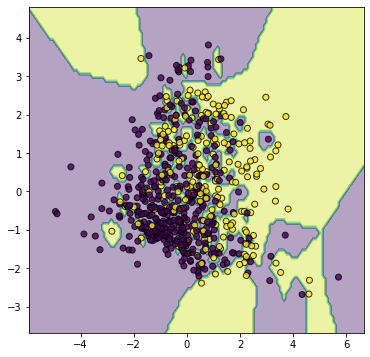

Training acc knn1: 1.000000
Testing acc knn1:  0.623377


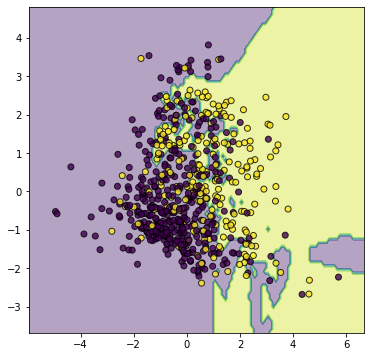

Training acc knn5: 0.785016
Testing acc knn5:  0.642857


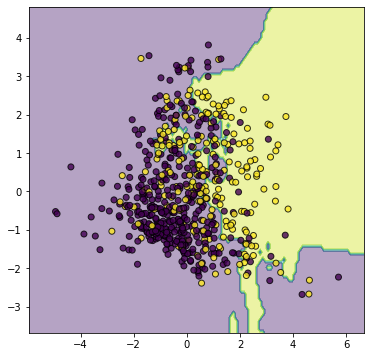

Training acc knn10: 0.762215
Testing acc knn10:  0.655844


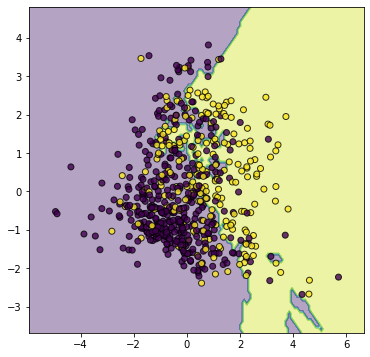

Training acc knn15: 0.754072
Testing acc knn15:  0.740260


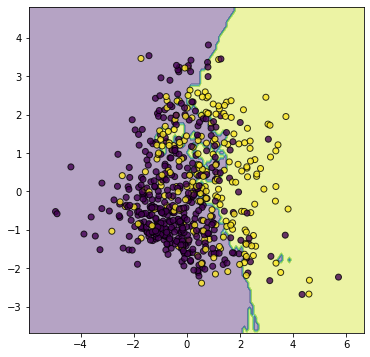

Training acc knn18: 0.749186
Testing acc knn18:  0.746753


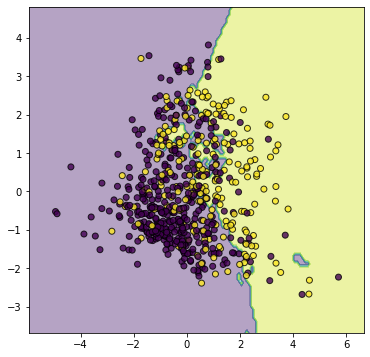

Training acc knn20: 0.747557
Testing acc knn20:  0.720779


In [47]:
### Import KNN and tuning the decesion boundary with different number of neighbors to avoid overfitting. Estimate accuracy. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn1)
print("Training acc knn1: %f"%accuracy_score(y_train, knn1.predict(X_train)))
print("Testing acc knn1:  %f"%accuracy_score(y_test, knn1.predict(X_test)))
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn5)
print("Training acc knn5: %f"%accuracy_score(y_train, knn5.predict(X_train)))
print("Testing acc knn5:  %f"%accuracy_score(y_test, knn5.predict(X_test)))
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn10)
print("Training acc knn10: %f"%accuracy_score(y_train, knn10.predict(X_train)))
print("Testing acc knn10:  %f"%accuracy_score(y_test, knn10.predict(X_test)))
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn15)
print("Training acc knn15: %f"%accuracy_score(y_train, knn15.predict(X_train)))
print("Testing acc knn15:  %f"%accuracy_score(y_test, knn15.predict(X_test)))
knn18 = KNeighborsClassifier(n_neighbors=18)
knn18.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn18)
print("Training acc knn18: %f"%accuracy_score(y_train, knn18.predict(X_train)))
print("Testing acc knn18:  %f"%accuracy_score(y_test, knn18.predict(X_test)))
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, knn20)
print("Training acc knn20: %f"%accuracy_score(y_train, knn20.predict(X_train)))
print("Testing acc knn20:  %f"%accuracy_score(y_test, knn20.predict(X_test)))

By comparing the above result, **knn18** model have the best accuracy with less overfitting issue while the boundary also looks better. Will choose knn18 for downstream knn processing.

**Part2.2 Support Vector Mahcine: C-Support Vector Classification (SVC)**

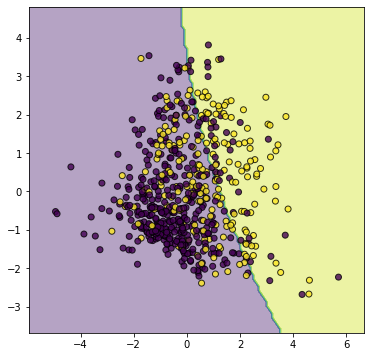

Training acc svc0_01: 0.719870
Testing acc svc0_01:  0.720779


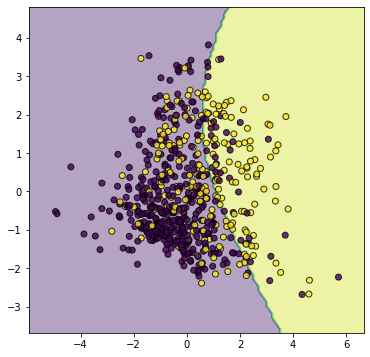

Training acc svc0_04: 0.728013
Testing acc svc0_04:  0.727273


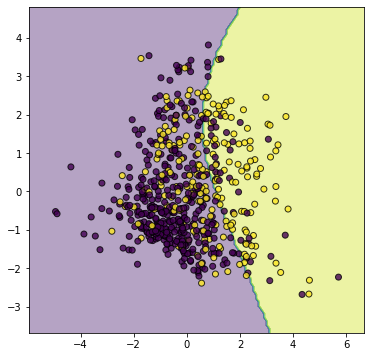

Training acc svc0_05: 0.729642
Testing acc svc0_05:  0.727273


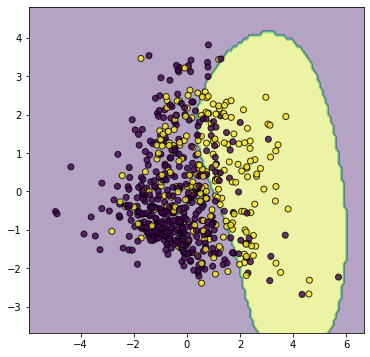

Training acc svc0_1: 0.739414
Testing acc svc0_1:  0.727273


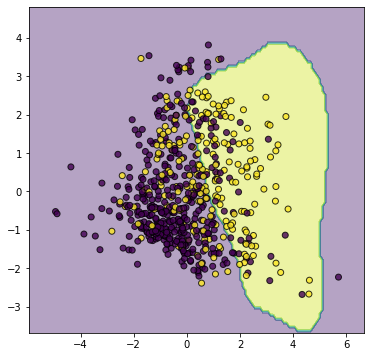

Training acc svc0_5: 0.734528
Testing acc svc0_5:  0.714286


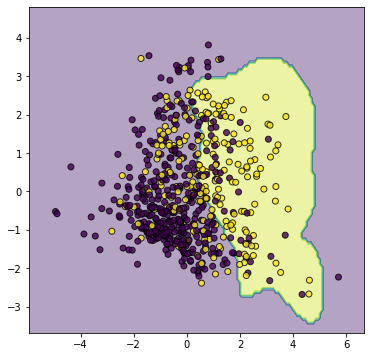

Training acc svc1: 0.744300
Testing acc svc1:  0.681818


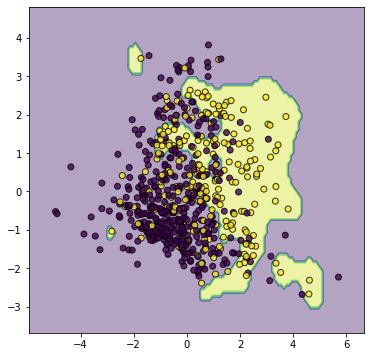

Training acc svc5: 0.802932
Testing acc svc5:  0.649351


In [56]:
### Import SVC with RBF kernel as the two classes are non-linearly separable. Tune the decesion boundary with different gamma value. 
from sklearn.svm import SVC
svc0_01 = SVC(kernel='rbf', gamma=0.01) #### The default kernel is rbf, so will skip that for conciseness.
svc0_01.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc0_01)
print("Training acc svc0_01: %f"%accuracy_score(y_train, svc0_01.predict(X_train)))
print("Testing acc svc0_01:  %f"%accuracy_score(y_test, svc0_01.predict(X_test)))
svc0_04 = SVC(gamma=0.04)
svc0_04.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc0_04)
print("Training acc svc0_04: %f"%accuracy_score(y_train, svc0_04.predict(X_train)))
print("Testing acc svc0_04:  %f"%accuracy_score(y_test, svc0_04.predict(X_test)))
svc0_05 = SVC(gamma=0.05)
svc0_05.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc0_05)
print("Training acc svc0_05: %f"%accuracy_score(y_train, svc0_05.predict(X_train)))
print("Testing acc svc0_05:  %f"%accuracy_score(y_test, svc0_05.predict(X_test)))
svc0_1 = SVC(gamma=0.1)
svc0_1.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc0_1)
print("Training acc svc0_1: %f"%accuracy_score(y_train, svc0_1.predict(X_train)))
print("Testing acc svc0_1:  %f"%accuracy_score(y_test, svc0_1.predict(X_test)))
svc0_5 = SVC(gamma=0.5)
svc0_5.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc0_5)
print("Training acc svc0_5: %f"%accuracy_score(y_train, svc0_5.predict(X_train)))
print("Testing acc svc0_5:  %f"%accuracy_score(y_test, svc0_5.predict(X_test)))
svc1 = SVC(gamma=1)
svc1.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc1)
print("Training acc svc1: %f"%accuracy_score(y_train, svc1.predict(X_train)))
print("Testing acc svc1:  %f"%accuracy_score(y_test, svc1.predict(X_test)))
svc5 = SVC(gamma=5)
svc5.fit(X_train, y_train)
plot_decision_boundaries(X_train, y_train, svc5)
print("Training acc svc5: %f"%accuracy_score(y_train, svc5.predict(X_train)))
print("Testing acc svc5:  %f"%accuracy_score(y_test, svc5.predict(X_test)))

By comparing the above result, **svc0_04** model minimizes over fitting (testing accuracy almost equal to training accuracy) while keeps better overall accuracy. The boundary also makes more sense. Will choose svc0_04 for downstream svc processing.

**Part2.3 Radom Forests (RF)**

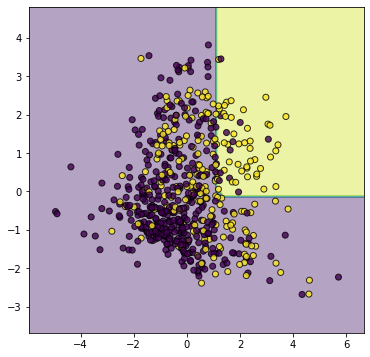

Training acc RF1: 0.706840
Testing acc RF1:  0.675325


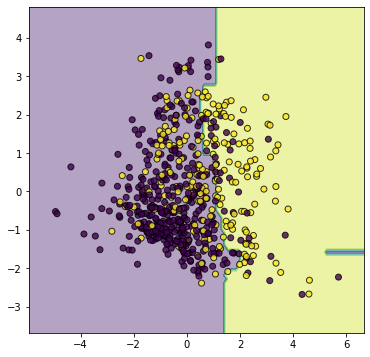

Training acc RF2: 0.745928
Testing acc RF2:  0.720779


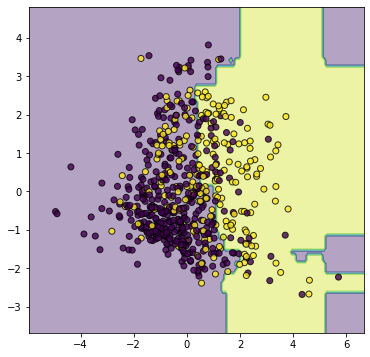

Training acc RF3: 0.757329
Testing acc RF3:  0.681818


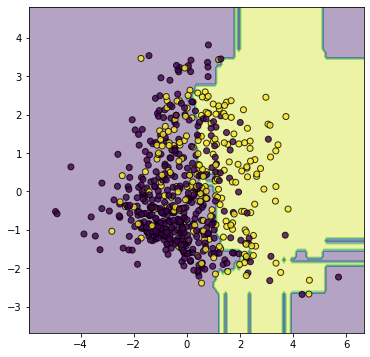

Training acc RF4: 0.771987
Testing acc RF4:  0.694805


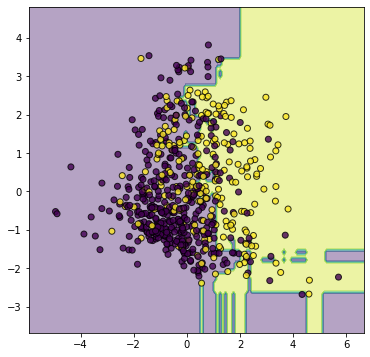

Training acc RF4: 0.807818
Testing acc RF4:  0.701299


In [49]:
### Import RM and tune the decesion boundary with different max depth value. Estimate accuracy. 
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier(max_depth=1,random_state=0)
RF1.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, RF1)
print("Training acc RF1: %f"%accuracy_score(y_train, RF1.predict(X_train)))
print("Testing acc RF1:  %f"%accuracy_score(y_test, RF1.predict(X_test)))
RF2 = RandomForestClassifier(max_depth=2,random_state=0)
RF2.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, RF2)
print("Training acc RF2: %f"%accuracy_score(y_train, RF2.predict(X_train)))
print("Testing acc RF2:  %f"%accuracy_score(y_test, RF2.predict(X_test)))
RF3 = RandomForestClassifier(max_depth=3,random_state=0)
RF3.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, RF3)
print("Training acc RF3: %f"%accuracy_score(y_train, RF3.predict(X_train)))
print("Testing acc RF3:  %f"%accuracy_score(y_test, RF3.predict(X_test)))
RF4 = RandomForestClassifier(max_depth=4,random_state=0)
RF4.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, RF4)
print("Training acc RF4: %f"%accuracy_score(y_train, RF4.predict(X_train)))
print("Testing acc RF4:  %f"%accuracy_score(y_test, RF4.predict(X_test)))
RF5 = RandomForestClassifier(max_depth=5,random_state=0)
RF5.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, RF5)
print("Training acc RF4: %f"%accuracy_score(y_train, RF5.predict(X_train)))
print("Testing acc RF4:  %f"%accuracy_score(y_test, RF5.predict(X_test)))

By tuning the RF parameter max_depth value, **RF2** model minimizes over fitting while generating best testing data accuracy. The boundary also makes sense. Will choose **RF2** for downstream RF processing.

**Part2.4 Logistic Regression(LR)**

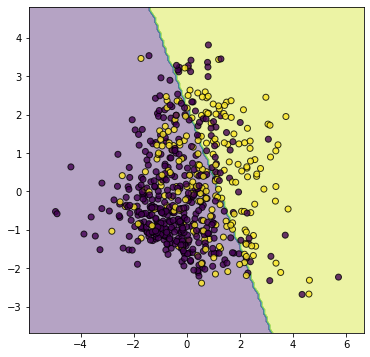

Training acc LR0_05: 0.716612
Testing acc LR0_05:  0.707792


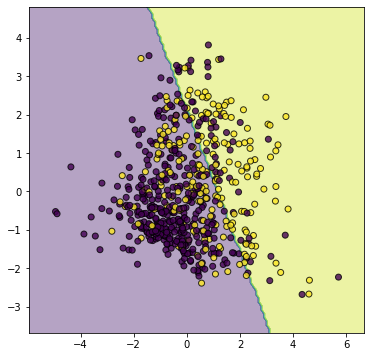

Training acc LR0_1: 0.721498
Testing acc LR0_1:  0.714286


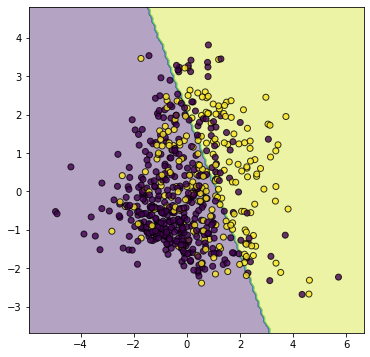

Training acc LR0_5: 0.719870
Testing acc LR0_5:  0.707792


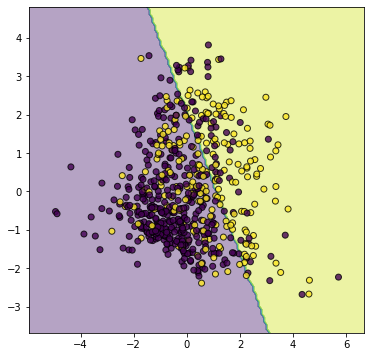

Training acc LR1: 0.719870
Testing acc LR1:  0.707792


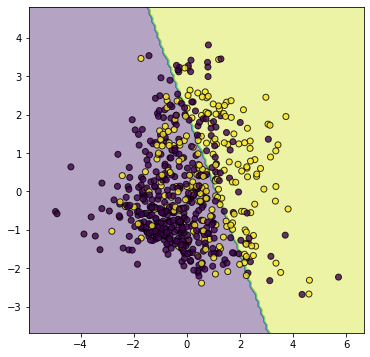

Training acc LR10: 0.719870
Testing acc LR10:  0.707792


In [50]:
### Import LR and tune the C value for different regularizaiton strength. Estimate accuracy.
from sklearn.linear_model import LogisticRegression
LR0_05 = LogisticRegression(penalty='l2', C=0.05, random_state=42)   ### Default panlty is l2, so will skip the option bellow.
LR0_05.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, LR0_05)
print("Training acc LR0_05: %f"%accuracy_score(y_train, LR0_05.predict(X_train)))
print("Testing acc LR0_05:  %f"%accuracy_score(y_test, LR0_05.predict(X_test)))
LR0_1 = LogisticRegression(C=0.1, random_state=42)   
LR0_1.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, LR0_1)
print("Training acc LR0_1: %f"%accuracy_score(y_train, LR0_1.predict(X_train)))
print("Testing acc LR0_1:  %f"%accuracy_score(y_test, LR0_1.predict(X_test)))
LR0_5 = LogisticRegression(C=0.5, random_state=42)  
LR0_5.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, LR0_5)
print("Training acc LR0_5: %f"%accuracy_score(y_train, LR0_5.predict(X_train)))
print("Testing acc LR0_5:  %f"%accuracy_score(y_test, LR0_5.predict(X_test)))
LR1 = LogisticRegression(random_state=42)  ### Default C value queal 1.
LR1.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, LR1)
print("Training acc LR1: %f"%accuracy_score(y_train, LR1.predict(X_train)))
print("Testing acc LR1:  %f"%accuracy_score(y_test, LR1.predict(X_test)))
LR10 = LogisticRegression(C=10, random_state=42) 
LR10.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, LR10)
print("Training acc LR10: %f"%accuracy_score(y_train, LR10.predict(X_train)))
print("Testing acc LR10:  %f"%accuracy_score(y_test, LR10.predict(X_test)))

By tuning the LR hyperparameter C value, **LR0_1** model with C=0.1 minimizes over fitting issue while producing best test data accuracy. Will choose **LR0_1** for downstream LR processing.

**Comparing the above best 4 different supervised classifiers:**

KNN:  Training acc knn18: 0.749186  &emsp;&emsp; Testing acc knn18:  0.746753

SVC:  Training acc svc0_04: 0.728013 &ensp;&ensp; Testing acc svc0_04:  0.727273

RF:   Training acc RF2: 0.745928  &emsp;&emsp;&emsp;&emsp;    Testing acc RF2:  0.720779
      
LR:   Training acc LR0_1: 0.721498 &emsp;&emsp;&emsp;   Testing acc LR0_1:  0.714286
      
It look like the SVC have the least over fitting issue while knn have higher accuracy. 

**Part3 Ensemble Voting**

To further improve the performance of these classifiers, will use ensembled voting approach to combine all the classifiers.

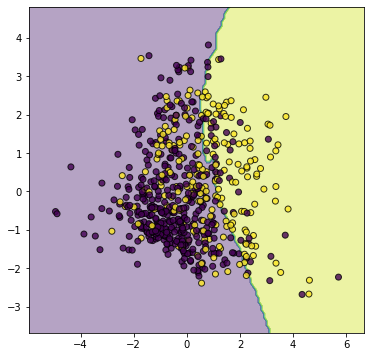

Training acc ensemble_mod1: 0.732899
Testing acc ensemble_mod1:  0.733766


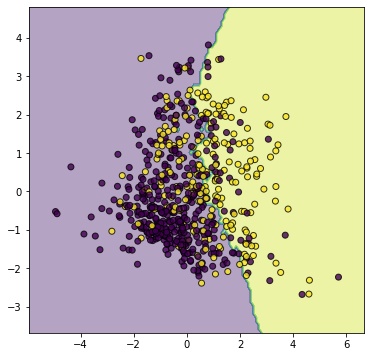

Training acc ensemble_mod2: 0.741042
Testing acc ensemble_mod2:  0.740260


In [85]:
#### Import voting classifier:
from sklearn.ensemble import VotingClassifier
#### combine the above 4 optimized model with hard voting.
ensemble_mod1 = VotingClassifier(estimators=[('knn', knn18), ('svc', svc0_04), ('rf', RF2), ('LR', LR0_1)],
                         voting='hard')
ensemble_mod1.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, ensemble_mod1)
print("Training acc ensemble_mod1: %f"%accuracy_score(y_train, ensemble_mod1.predict(X_train)))
print("Testing acc ensemble_mod1:  %f"%accuracy_score(y_test, ensemble_mod1.predict(X_test)))
#### Enable probability while default is False. Otherwise will throw error when using soft voting.
svc0_04 = SVC(gamma=0.04, probability=True)
svc0_04.fit(X_train, y_train)
#### combine the above 4 optimized model with different weights.
ensemble_mod2 = VotingClassifier(estimators=[('knn', knn18), ('svc', svc0_04), ('rf', RF2), ('LR', LR0_1)],
                         voting='soft', weights=[8,5.516,2,1])
ensemble_mod2.fit(X_train,y_train)
plot_decision_boundaries(X_train, y_train, ensemble_mod2)
print("Training acc ensemble_mod2: %f"%accuracy_score(y_train, ensemble_mod2.predict(X_train)))
print("Testing acc ensemble_mod2:  %f"%accuracy_score(y_test, ensemble_mod2.predict(X_test)))


The ensembled model generate better accuracy than SVC0_04 model while lower overfitting issue than knn18 model.

**Part4 Cross Validation**

In [102]:
### Cross validating the ensembled model:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
n_samples = X_train.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
ensemble_mod1.fit(X_train,y_train)
scores_ensembled1 = cross_val_score(ensemble_mod1, X_train, y_train, cv=cv)
print(scores_ensembled1)
ensemble_mod2.fit(X_train,y_train)
scores_ensembled2 = cross_val_score(ensemble_mod2, X_train, y_train, cv=cv)
print(scores_ensembled2)

[0.77297297 0.67567568 0.74594595 0.71891892 0.75675676]
[0.74594595 0.66486486 0.71351351 0.72432432 0.74054054]
